<h1> Analisis de Codigo de Caso #2</h1>
<h2> Parte #1 de analisis de codigo </h2>
<h2> Variables Cuantitativas</h2>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Se utiliza cuando no se presentan los graficos
%matplotlib inline

In [2]:
#Importacion del archivo de trabajo
data=r"C:\Users\aoban\OneDrive\Escritorio\Curso Analisis de datos\Machine Learning\Caso 2\train.csv"
df=pd.read_csv(data)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#Revsion de informacion general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# df.count() does not include NaN values

#Elimina columnas con 30% o menos de valores nulos

df2 = df[[column for column in df if df[column].count() / len(df) >= 0.3]]

#Elimina la columna id
del df2['Id']

#Imprime el nombre de las columnas eliminadas
print("List of dropped columns:", end=" ")

for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')

df = df2

List of dropped columns: Id, Alley, PoolQC, Fence, MiscFeature, 



count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<Figure size 648x576 with 0 Axes>

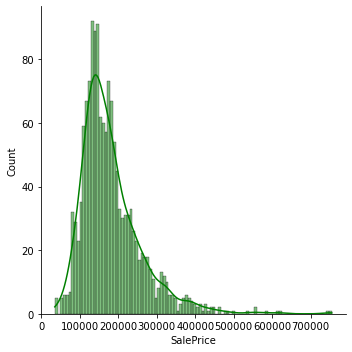

In [56]:
#Imprime las estadisticas de la columna SalePrice
print(df['SalePrice'].describe())

#Imprime un displot con bines
plt.figure(figsize=(9, 8))
sns.displot(df['SalePrice'], color='g', bins=100,kde=True) #Se modifica hist_kws={'alpha': 0.4} xq genera un warning

In [6]:
#Imprime una lista del tipo de variables
list(set(df.dtypes.tolist()))

[dtype('O'), dtype('float64'), dtype('int64')]

In [7]:
#Selecciona las variables float e Int
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


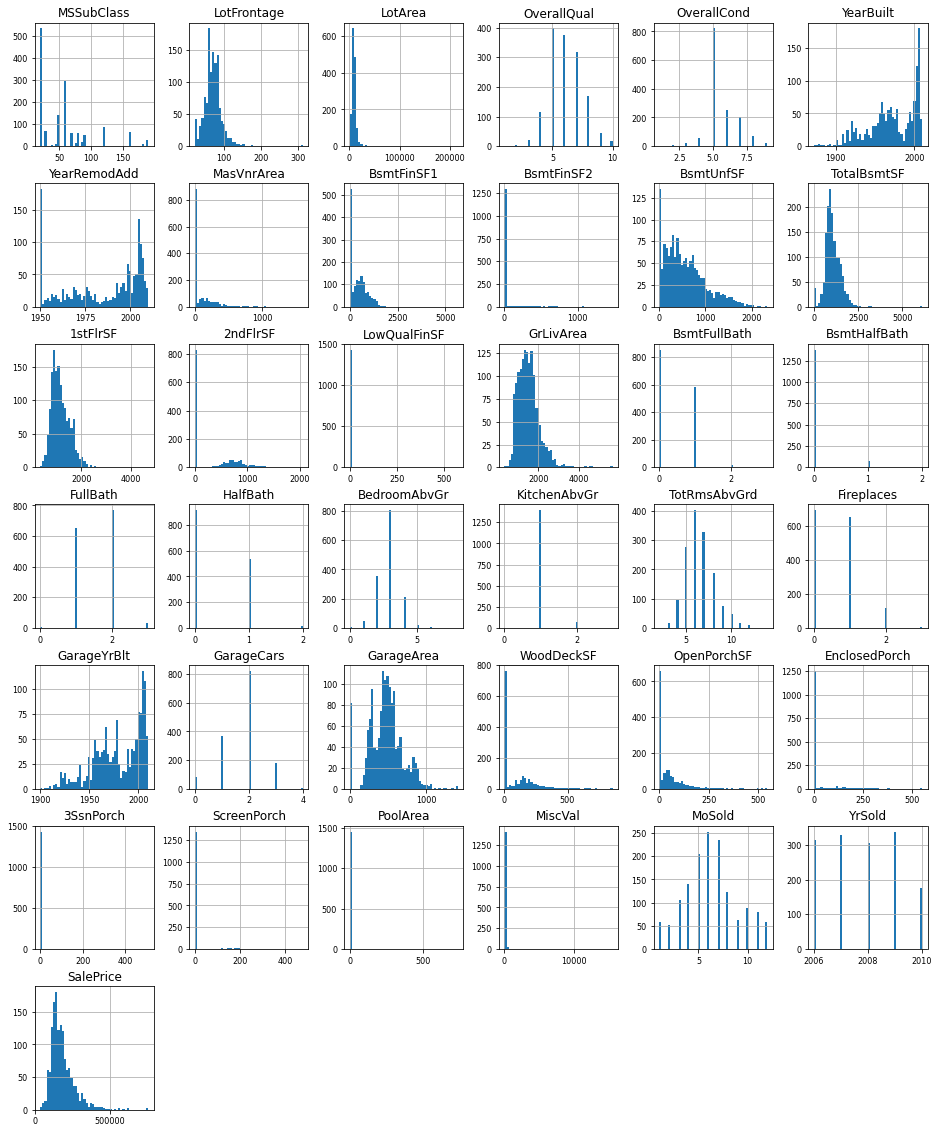

In [8]:
#Muestra los histogramas de las variables seleccionadas
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

In [9]:
#Funcion de correlacion,en relacion de la columna salesprice
df_num_corr = df_num.corr()['SalePrice'][:-1] # -1 because the latest row is SalePrice

#Seleciona las correlaciones mayores a 0.5
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)

#Imprime la lista de valores con mayor correlacion
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 10 strongly correlated values with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


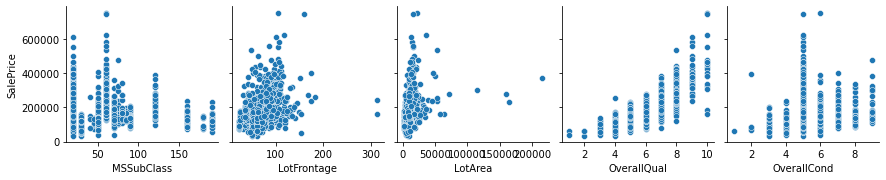

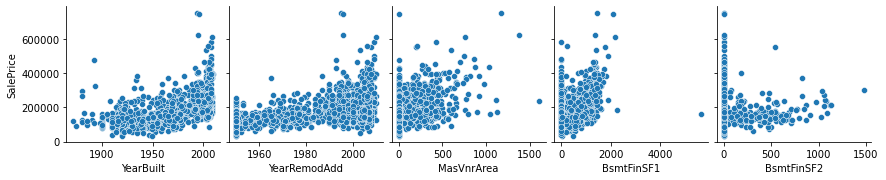

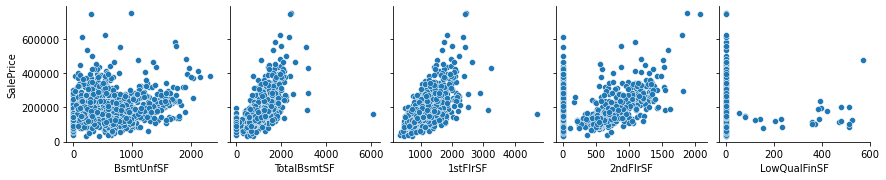

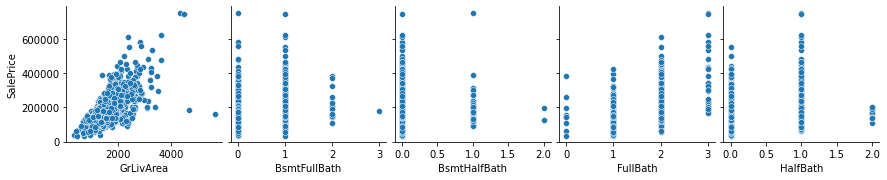

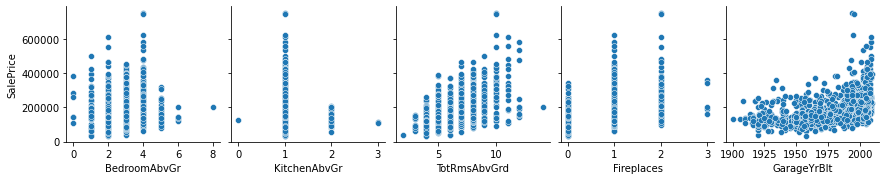

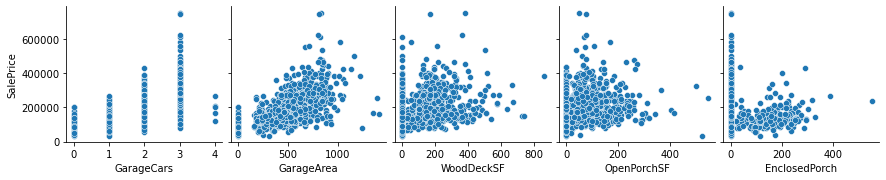

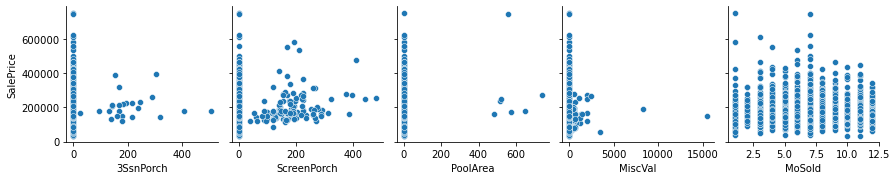

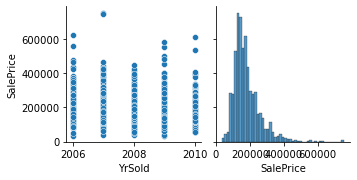

In [10]:
#Muestra graficos de dispersion
for i in range(0, len(df_num.columns), 5):
    #Variables contra variable precio
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['SalePrice'])

In [11]:
#Elimina los valores en 0 y realiza las correlaciones
import operator

individual_features_df = []

for i in range(0, len(df_num.columns) - 1): # -1 because the last column is SalePrice
    
    tmpDf = df_num[[df_num.columns[i], 'SalePrice']]
    tmpDf = tmpDf[tmpDf[df_num.columns[i]] != 0]
    
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['SalePrice'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))

for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

   KitchenAbvGr: -0.1392006921778576
       HalfBath: -0.08439171127179902
     MSSubClass: -0.08428413512659509
    OverallCond: -0.07785589404867797
         YrSold: -0.028922585168736813
   BsmtHalfBath: -0.02883456718548182
       PoolArea: -0.014091521506356765
   BsmtFullBath: 0.011439163340408606
         MoSold: 0.046432245223819446
      3SsnPorch: 0.06393243256889088
    OpenPorchSF: 0.08645298857147718
        MiscVal: 0.08896338917298921
     Fireplaces: 0.12166058421363891
      BsmtUnfSF: 0.16926100049514173
   BedroomAbvGr: 0.18093669310848806
     WoodDeckSF: 0.1937060123752066
     BsmtFinSF2: 0.19895609430836594
  EnclosedPorch: 0.24127883630117497
    ScreenPorch: 0.2554300795487841
        LotArea: 0.2638433538714051
   LowQualFinSF: 0.30007501655501323
    LotFrontage: 0.35179909657067737
     MasVnrArea: 0.43409021975689227
     BsmtFinSF1: 0.47169042652357296
    GarageYrBlt: 0.4863616774878596
   YearRemodAdd: 0.5071009671113866
      YearBuilt: 0.52289733287949

In [12]:
#Muestra las correlaciones con la data limpia de valores 0

golden_features_list = [key for key, value in all_correlations if abs(value) >= 0.5]
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 11 strongly correlated values with SalePrice:
['YearRemodAdd', 'YearBuilt', 'TotRmsAbvGrd', 'FullBath', '1stFlrSF', 'GarageArea', 'TotalBsmtSF', 'GarageCars', '2ndFlrSF', 'GrLivArea', 'OverallQual']


<h2> Lecciones de Codigo parte #1 </h2>
<p>1. En esta parte del codigo se importan las librerias y se importa el dataframe para el analisis.</p>
<p>2. Luego se utiliza la funcion info, para observar la infromacion general del dataset,al observarse muchos valores nulos en las columnas, se realiza una funcion parta determinar los valores nulos mayores al 30% del dataset.<p/>
<p>3. Se separa la variable de Precio de Venta y se hace un histograma.</p>
<p>4.Luego se muestran unicamente los valores int y float, del dataframe,y se grafican</p>
<p>5. Posteriomente se hace buscan las correlaciones de variables mayores al 0.5 y se grafican con histrograma y con graficos de dispersion.</p>
<p>6.Se buscan las correlaciones con Saleprice, execptuando los valores nulos, y se obtienen las nuevas variables de analisis.</p>

<h2> Parte #2 de Analisis </h2>
<h2> Variables cualitativas </h2>

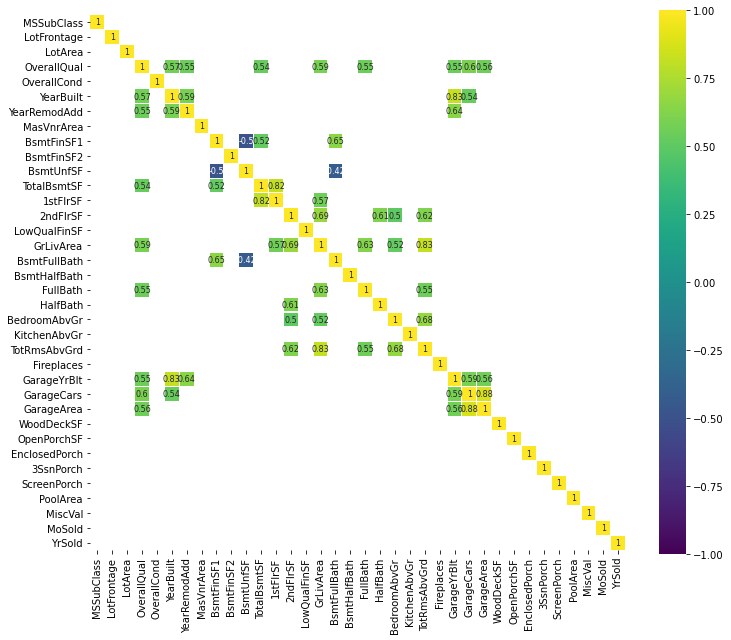

In [13]:
# Muestra un mapa de correlacion sin SalePrice
corr = df_num.drop('SalePrice', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

#Correlacion entre un rango de 0.5 y -0.4
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [14]:
#Muestra las variables cuantitativas
quantitative_features_list = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',
    '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']
df_quantitative_values = df[quantitative_features_list]
df_quantitative_values.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,856,856,854,0,1710,...,2,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,1262,1262,0,0,1262,...,2,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,920,920,866,0,1786,...,2,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,756,961,756,0,1717,...,3,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,1145,1145,1053,0,2198,...,3,836,192,84,0,0,0,0,0,250000


In [15]:
#Muestra las variables cuantitativas
features_to_analyse = [x for x in quantitative_features_list if x in golden_features_list]
features_to_analyse.append('SalePrice')
features_to_analyse

['TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

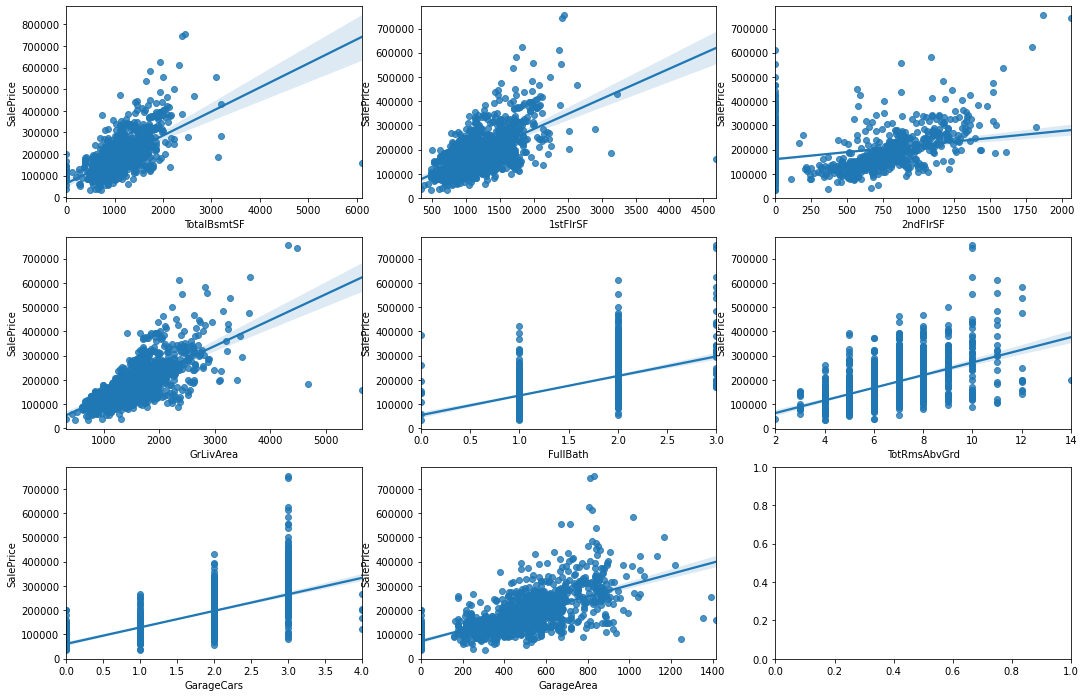

In [16]:
#Muestra los graficos de dispersion por cada variable y Saleprice

fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (18, 12))


for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='SalePrice', data=df[features_to_analyse], ax=ax)


In [17]:
#Muestra las variables categoricas y mantiene la columna de SalePrice
categorical_features = [a for a in quantitative_features_list[:-1] + df.columns.tolist() if (a not in quantitative_features_list[:-1]) or (a not in df.columns.tolist())]
df_categ = df[categorical_features]
df_categ.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2003.0,RFn,TA,TA,Y,2,2008,WD,Normal,208500
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,1976.0,RFn,TA,TA,Y,5,2007,WD,Normal,181500
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2001.0,RFn,TA,TA,Y,9,2008,WD,Normal,223500
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,1998.0,Unf,TA,TA,Y,2,2006,WD,Abnorml,140000
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,2000.0,RFn,TA,TA,Y,12,2008,WD,Normal,250000


In [18]:
#Muestra las variables no numericas
df_not_num = df_categ.select_dtypes(include = ['O'])
print('There is {} non numerical features including:\n{}'.format(len(df_not_num.columns), df_not_num.columns.tolist()))

There is 39 non numerical features including:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


(array([0, 1, 2, 3]),
 [Text(0, 0, 'No'), Text(1, 0, 'Gd'), Text(2, 0, 'Mn'), Text(3, 0, 'Av')])

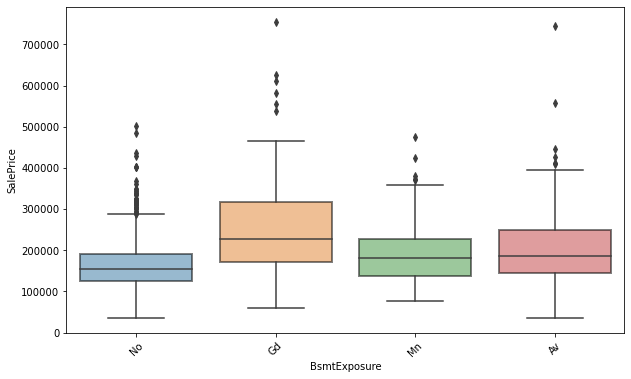

In [19]:
#Muestra una variable categorica
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='BsmtExposure', y='SalePrice', data=df_categ)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Normal'),
  Text(1, 0, 'Abnorml'),
  Text(2, 0, 'Partial'),
  Text(3, 0, 'AdjLand'),
  Text(4, 0, 'Alloca'),
  Text(5, 0, 'Family')])

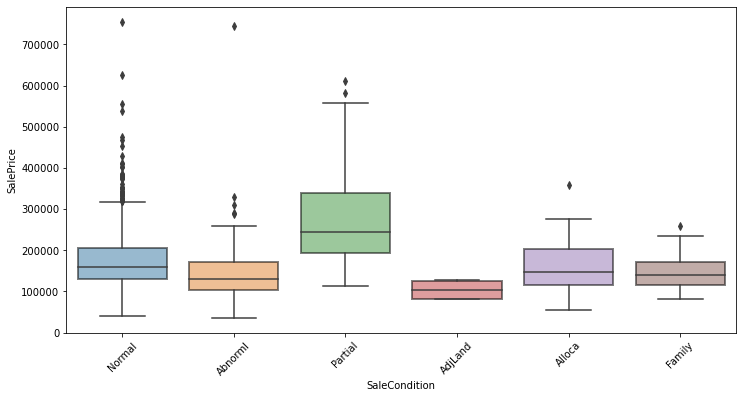

In [20]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='SaleCondition', y='SalePrice', data=df_categ)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

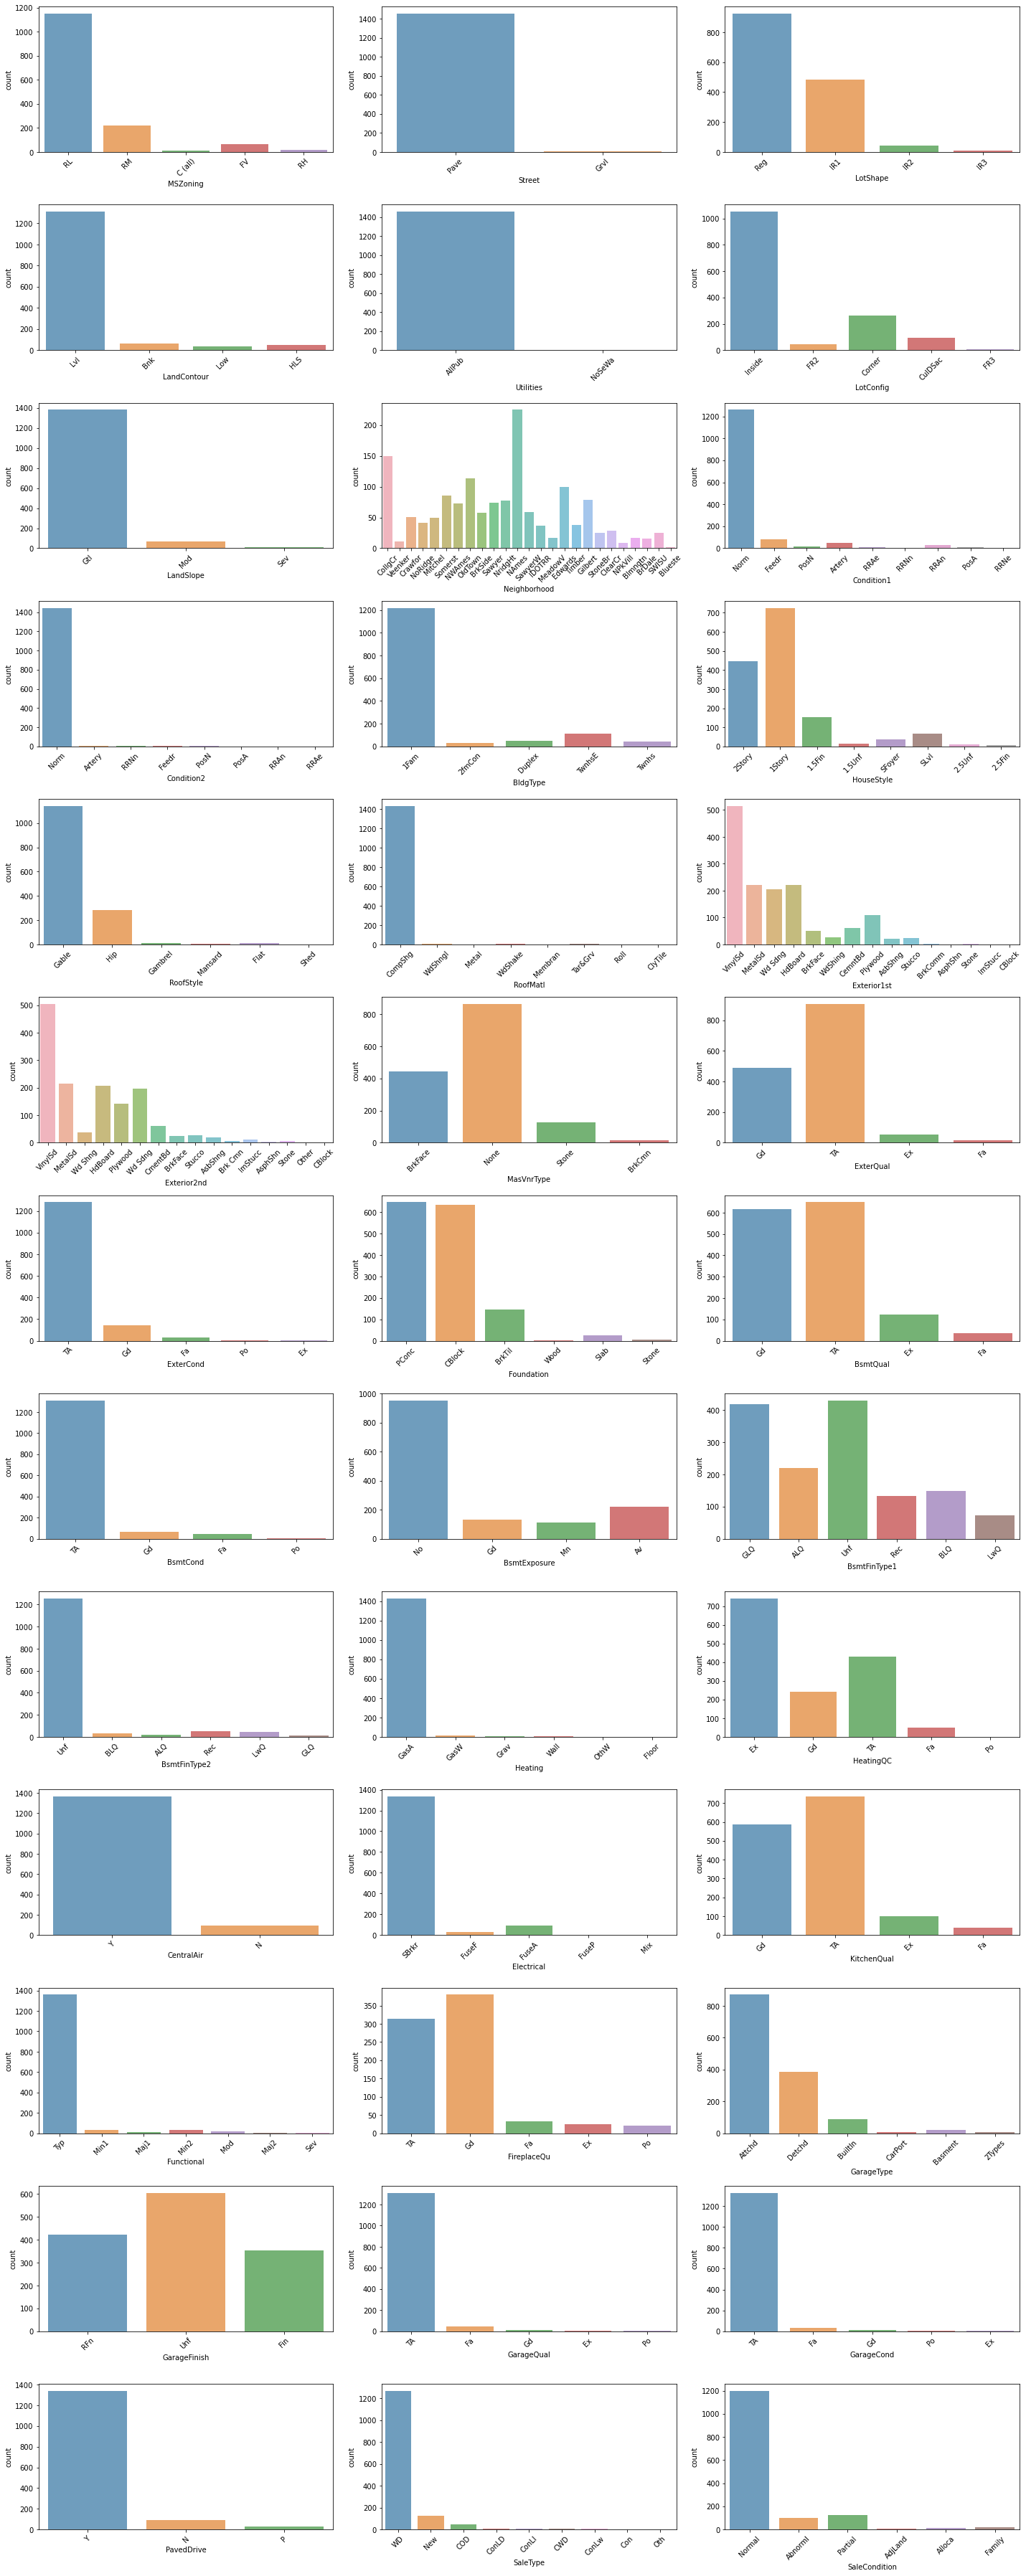

In [53]:
fig, axes = plt.subplots(round(len(df_not_num.columns) / 3), 3, figsize=(20, 50))

for i, ax in enumerate(fig.axes):
  
    if i < len(df_not_num.columns):
        
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)# Se cambio ax.set_xticklabels por plt.setp
        
        sns.countplot(x=df_not_num.columns[i], alpha=0.7, data=df_not_num, ax=ax)

fig.tight_layout()

<h2> Lecciones aprendidas de Parte #2 /h2>

 <p>1.Se hace un analisis de correlacion entre las variables sin tomar en cuenta el precio de venta y se grafican en un cuadro de calor</p>
 <p>2.Se separan las variables cunatitivas de las cualitiativas. Se hacen graficos de dispersion de las cualitiativas.</p>
 <p>3.Se hace un analisis de las variables cualitativas por individual, con grafico de cajas, y se hace un analisis de las variables cualitativas con graficos de barra vertical.</p>   
